In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = pd.read_csv('Downloads/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# tips가 무엇에 대한 데이터인가를 먼저 혼자 생각을 해봤는데, 0부터 243까지 총 243명
# 각각이 음식점에서 지불한 비용(total_bill), 각각이 종업원에게 지불한 팁(tip),
# 각각의 성별(sex), 각각의 흡연 여부(smoker), 각각의 방문 날짜(day),
# 각각의 방문 시점(time), 각각의 명수(size)인 것으로 보인다. 분석할 것들이 많아보인다.

In [4]:
# 시각화를 해보기 전에 예측을 한다면
# 1. total_bill이 클 수록 tip도 클 것
# 2. size가 클 수록 tip도 클 것
# 3. 비흡연자일수록 tip이 클 것 ..? (이건 근거X)
# 4. 남자의 tip이 더 클 것..?
# 5. 저녁의 tip이 더 클 것..?
# 6. 주말의 tip이 더 클 것..?

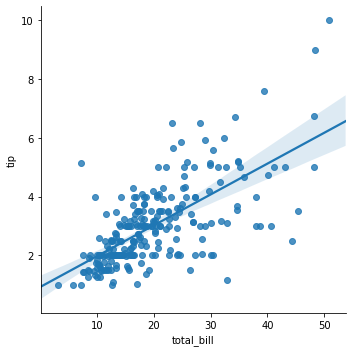

In [5]:
# 1. total_bill과 tip의 관계
sns.lmplot(data=tips, x='total_bill', y='tip')

In [6]:
# lmplot의 결과를 통해서 봤을 때, 일반적인 우상향의 형태를 그린다.
# 따라서 전체 계산 금액이 클 수록 종업원에게 준 팁 또한 커진다는 것을 알 수 있다.

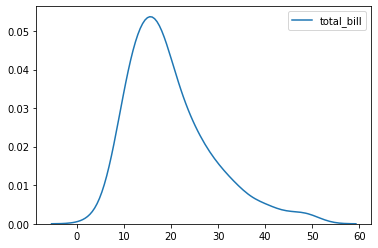

In [7]:
# total_bill과 tip 각각의 평균은 어느정도인가?
sns.kdeplot(tips['total_bill']) #평균 18달러(2만원정도)

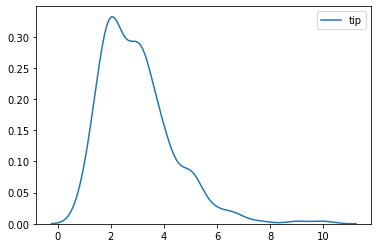

In [8]:
sns.kdeplot(tips['tip']) # 팁의 평균은 2달러 정도.

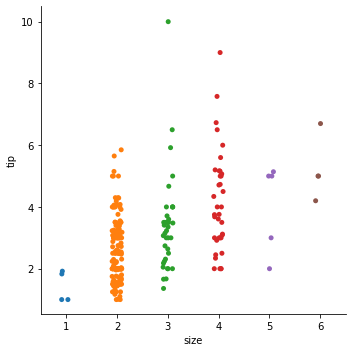

In [9]:
# 2. size와 tip의 상관관계
sns.catplot(data=tips, x='size', y='tip')

In [10]:
# 그래프를 보면, size가 클 수록 tip이 증가하는 양상이 보여지긴 하지만 양상이 뚜렷하다고 보기엔 좀 어렵다. (4 size의 경우 특히나 넓게 분포돼있음)
# 그래서.. 예측이 어느정도는 맞은 것 같지만 모수가 좀 적은 것 같다.

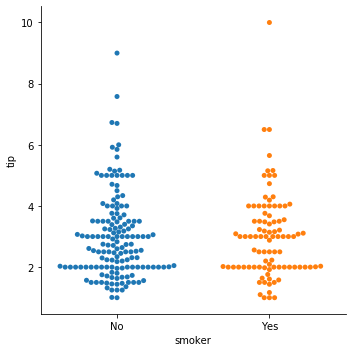

In [11]:
# 3. 흡연여부와 tip의 상관관계 분석
sns.catplot(data=tips, x='smoker', y='tip', kind='swarm')

In [12]:
# 그래프를 보면, 흡연 여부와 tip은 큰 상관관계가 없다. 그래서, 세 번째 예측은 틀렸다고 볼 수 있다.

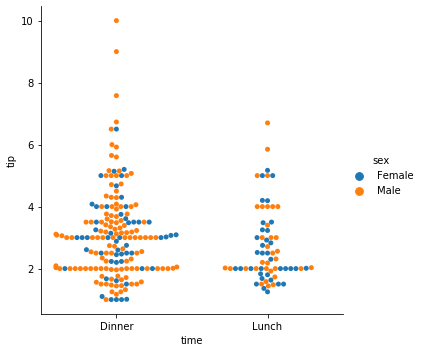

In [13]:
# 4. 방문 시점과 tip의 상관관계 분석
sns.catplot(data=tips, x='time', y='tip', kind='swarm', hue='sex')

In [14]:
# 그래프를 보면, 두 가지를 알 수 있다.
# 1. 몇 가지의 이상점을 제외한다면 방문 시점과 tip은 매우 뚜렷한 상관관계를 보이지는 않지만, 저녁의 경우 점심때보다 tip의 평균값이 좀 더 높게
# 나타난다는 것을 확인할 수 있고, 
# 2. 해당 음식점에는 여자의 방문 비율보다 남자의 비율이 훨씬 높다는 것을 알 수 있다.(+추가로, 높은 팁을 준 건 대부분 남자임)

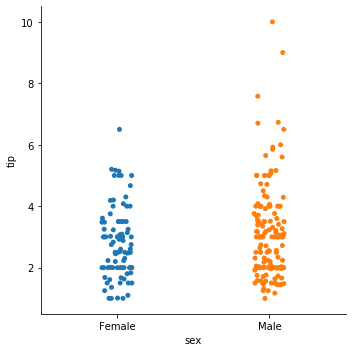

In [15]:
# 5. 성별과 tip의 상관관계 분석
sns.catplot(data=tips, x='sex', y='tip')

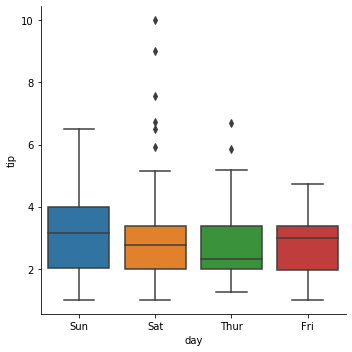

In [16]:
# 6. 방문 날짜와 tip의 상관관계 분석
sns.catplot(data=tips, x='day', y='tip', kind='box')

In [17]:
# 그래프를 보면, 이상점을 포함한다면 주말, 특히 토요일에 tip이 높은 편이라는 걸 알 수 있고
# 이상점을 제외한다면 주말이라고 해서 딱히 평일(목, 금)에 비해 높은 tip이 형성되어있는 것은
# 아니라는 점을 확인할 수 있다. 유의미한 차이는 아니나 토요일에  tip의 분포가 살짝 다른 날에 비해 높다.

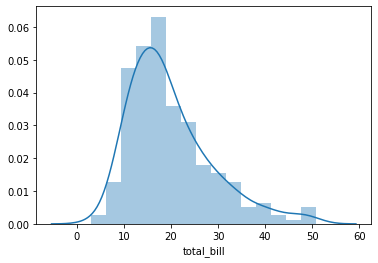

In [18]:
# total_bill에 대한 distplot ($15~20 부근이 가장 비율이 높음)
sns.distplot(tips['total_bill'], bins=15)

In [19]:
정리하자면 .. 
1. total_bill이 클 수록 tip도 크다.
2. size가 클 수록 tip도 커지는 양상이 보이긴 하지만 매우 뚜렷한 수준은 아니다. (모수가 더 많았으면 뚜렷해졌을 것 같다.)
3. 흡연 여부와 tip은 당연하게도 상관관계가 없다.
4. 저녁의 tip이 더 크긴 크다. 근데 그 차이가 크진 않다.
5. 평일/주말의 여부와 tip은 유의미한 상관관계를 갖고 있다고 보긴 어렵다.
6. 남자의 평균 tip이 더 높다. (일단 모수도 남자가 훨씬 많음. 각자의 모수가 다 많았다면 차이를 더 확연하게 볼 수 있었을 것으로 보인다.)

SyntaxError: invalid syntax (<ipython-input-19-64da6ba37f35>, line 1)